# Simple Logistic Regression
A very simple logistic regression to predict college admissions based on SAT scores

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('college_acceptance.csv')

In [3]:
raw_data.head() #checking the data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


# Dummy Coding Variables


In [4]:
data_dummy = pd.get_dummies(raw_data, drop_first=True) #drop first to ensure N-1 groups are made for our dummy variables
data_dummy

,SAT,Admitted_Yes
0,1363,False
1,1792,True
2,1954,True
3,1653,False
4,1593,False
...,...,...
163,1722,True
164,1750,True
165,1555,False
166,1524,False


In [5]:
data_dummy = data_dummy.astype(float) #this converts the boolean "True/False" into 1/0 and also preserves the rest of the values
data_dummy

,SAT,Admitted_Yes
0,1363.0,0.0
1,1792.0,1.0
2,1954.0,1.0
3,1653.0,0.0
4,1593.0,0.0
...,...,...
163,1722.0,1.0
164,1750.0,1.0
165,1555.0,0.0
166,1524.0,0.0


# Define Variables

In [6]:
y = data_dummy['Admitted_Yes']
x1 = data_dummy['SAT']

## Visualise the Data

<function matplotlib.pyplot.show(close=None, block=None)>

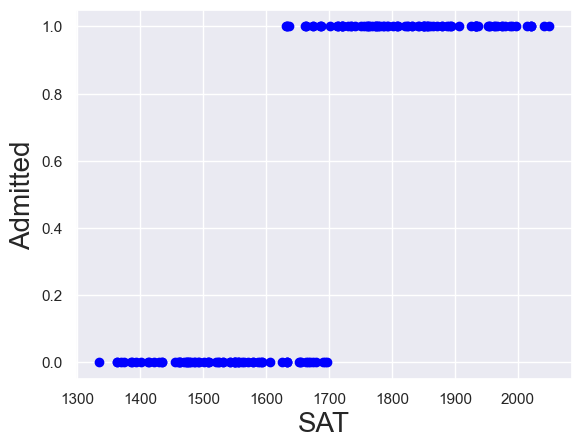

In [7]:
plt.scatter(x1,y,color = 'blue')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show #a typical logistic distribution (1, 0)

# Logistic Regression

In [8]:
x = sm.add_constant(x1) #add constant
reg_log = sm.Logit(y,x) #define the variable holding the model
results_log = reg_log.fit() #run the model



Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


## Logistic Regression Curve

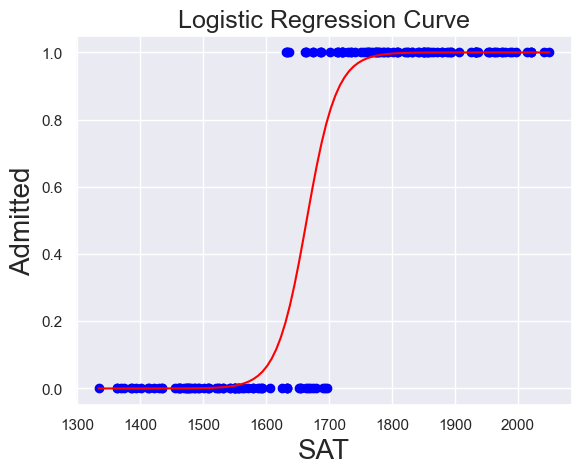

In [11]:
def logistic_function(x):
    return 1 / (1 + np.exp(-(results_log.params.iloc[0] + results_log.params.iloc[1] * x))) #define the logistic function 

x_values = np.linspace(min(x1), max(x1), 100)
y_values = logistic_function(x_values)
plt.scatter(x1, y, color='blue', label='Data')
plt.plot(x_values, y_values, color='red', label='Logistic Regression Curve')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.title('Logistic Regression Curve', fontsize=18)
plt.show()

Basic interpretation. 
- Approaching the value of 1550 SAT, admittance gets to about 0%
- At around 1650 SAT, there's about a 50% chance of being admitted. 
- at 1700, the chance grows to about 80%
- By 1800 SAT score, admission is 100%

### Results Summary

In [14]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Admitted_Yes   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.7992
Time:                        10:13:30   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Maximum likelihood function:
- Tries to maximise the positive prediction of the model

Log likelihood:
- More popular metric
- Bigger is better

LL-null:
- Log likelihood of a model with no variables
- Use to compare with the Log likelihood

Log likelihood ratio p-value:
- Does the LL differ significantly from the LL-null?

R-square (pseudo)
- Isn't the same as logistic regression, but attempts to guage the captured variance from the features to the target
- Mostly used to compare variations of the same model (i.e., feature selection for prediction)

Interpretation of Coefficient:
- When the SAT increases by 1, the odds of addmittance incrases by 4.2%
